- Yew Brown
- Student ID: 33880799
- BSc Creative Computing
- Generative Drawing
- Goldsmiths, University of London
- 12.01.2026

# fȯling daun stēs ov lait - Generative Graphic Score

## Introduction

## Concept & Background Research

- concept for piece, musical and graphic

The concept for this piece originated in the spring of 2025 when I was reading All the Lovers in the Night by Mieko Kawakami. I find all of her descriptions of light beautiful and emotive, but I had recently read a particular passage where she describes the main characters synesthetic fantasy about light while listening to a Chopin lullaby.

When I was sitting in Sly Tone cafe in the Goldsmiths CCA around that time, thinking about the things I'd like to create and while looking at the sunlight outside. The idea of a harp falling down a staircase made of light came to mind with a subtly warm and bright feeling. I thought that a way to direct somebody to create the sound of it would be to make a graphic score depicting lines that cascade in a downward trajectory like rays of light filtering through the branches of a tree or a window - like some kind of abstraction of a staircase made of light.
That is where the concept for the structure, texture and harmony of the music and the score came from.

Behind this inspiration is also a motivation to pursue some of my previous endevours in sound and music further. Over winter and spring 2023-2024, I took part in a series of workshops at the Institue for Contemporary Art (ICA) in London. These revolved around developing a collaborative sound art project with the other participants and culminated in a public workshop and performance at the ICA of that project. The final outcome involved asking the attendants of the workshop/performance to create graphic scores on (projector slide sheets??) from a series of promts we had created (link?). Which would be projected on a screen over the performance area and interpreted by us as perfmormers through free improvisation.

At the same time as the performance with ICA Creatives Sound at the ICA, I also created a piece of music called love's song which i was happy with and felt like a development in my own work is was satisfied with (because .....)


- background with graphic scores and indeterminate/generative music 
  * in particular: love's song, ICA Creative Sound, generative pieces
  * combining approaches learnt from these
  * building on my own compositions - harmonically, conceptually a inheriting from love's song

- inspirations and research
  * John Cage - Fontana Mix
  * Cornelius Cardew
  * Iannis Xenakis - Pithoprakta
- improvisational music
  * Miles Davis - In A Silent Way
- textural examples
  * Sawako


## Technical Implementation

- explain development process
- lift example functions out of the code w executable demostrations of what they do (e.g. numerically) 
  * clarify important parts of the code and what they do - escpecially more arcane parts

- show some iterations of the code - notes made while developing - examples of what was produced at different stages - even if code is lost (explain what was going on in that code to produce it)
- points that were challenging?

0 [440, 110, 220, 440, 440, 220, 440, 440, 110, 550, 550, 440, 440, 0, 220, 220, 550, 550, 0, 550, 110, 110, 440, 550, 550, 550, 440, 0, 110, 440, 0]


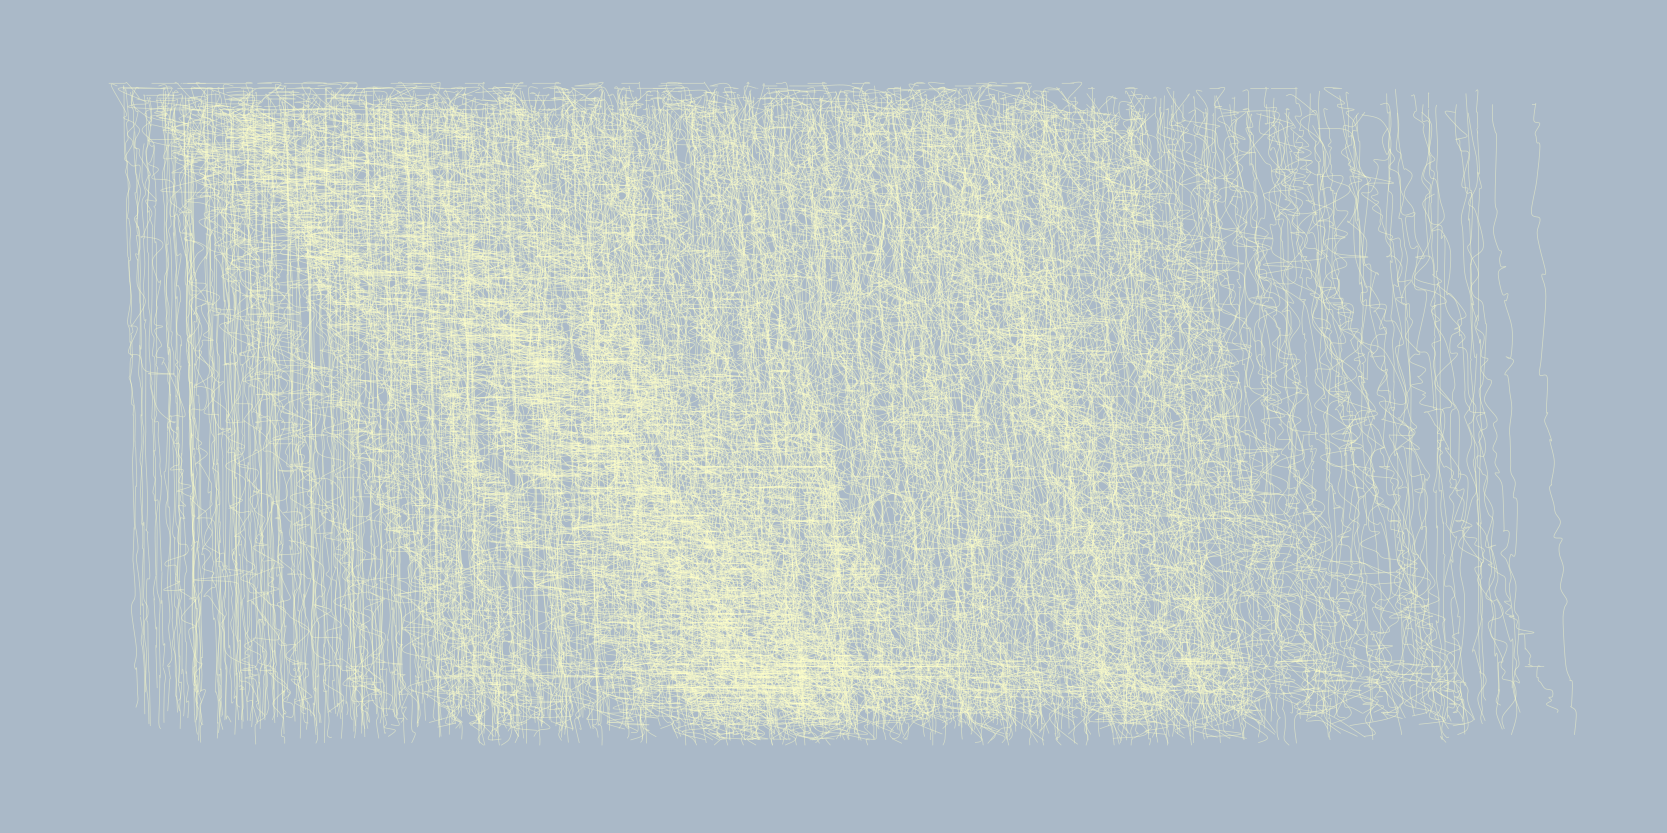

In [6]:
# WIP code refactoring

from py5canvas import *

import random
import numpy as np

create_canvas(1667, 833)

background(170,185,200)
fill(250,255,200,125)
stroke(255,255,200,125)
stroke_weight(0.33)

# distance the vertical lines are apart
line_spacing = width/80; 

# initial pen position
x, y = 0, 0

# draws a curve connecting line points
def draw_line(x_bias, x_random, sum_lin):
    
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i] + x_bias[i], sum_lin[i] + y_offset) # <- tidy &/or calarify values used here 
    end_shape()

# [8,10,11,12,15], 15:12:11:10:8 polyrhythm - alt. expanded values: [24,27,30,33,36,40,45], full scale cluster ratios 1 2 3 ^4 5 6 7
polyrhythm_nodes = [24,27,30,33,36,40,45]

# initalise empty lists <- better in the calc_lines function?
line_calcs = []
summed_line = []

def calc_lines(): # <- separate into 2 functions calc and sum - better modularity - it's not crazily long, though
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int((width*0.33)/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = height * 0.1
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int(((height*0.8)-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])

            if node_select < node_chance: 
                summed_line[lin].append((height*0.8)-5)   

        summed_line[lin].sort() # not necessary, but good for readability 

# vv better initialised inside function?
macro_pos = 0
micro_pos = []
# determine which pass of the canvas to centre macro dynamic peak on
def dynamic_form(passes): 
    divisions = [0,1,2,3,4,5] # positions along the duration of the score (no. passes) the macro peak can occur

    macro_pos = int((passes/5) * random_choice(divisions)) # gives which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append(int(((width*0.33)/5) * random.choice(divisions)))

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

# calculate gaussian field centred on determined x position per pass
def gaussian_field(current_pos, centre, range):
    return np.exp(-((current_pos - centre)**2) / (2 * range**2)) 

# include default values that prevent lines from being dead straight - if gaussian_weight < 0.1(for e.g.): x & node = default vals
# also use dynamics to change bias (drift) of lines?


# -- dynamic variations across all passes of the canvas -- 

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_var_loc = abs(gaussian_weight * np.random.normal(3, 2)) # 11,6
    x_var_scale = abs(gaussian_weight * np.random.normal(5, 4)) # 19,12

    # print(x_var_loc, x_var_scale)

    return [x_var_loc, x_var_scale]

def macro_line_drift(draw_pass):
    x_bias_loc = 0
    x_bias_scale = 0

    dec_line_spacing = 0

    # dynamically decrease line_spacing along with increased drift

    centre = macro_pos
    sigma = 2
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    
    # prevent lines from becoming totally straight/nodeless by keeping gaussian_weight away from ~0.0
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    x_bias_loc = abs(gaussian_weight * np.random.normal(1.5, 1)) 
    x_bias_scale = abs(gaussian_weight * np.random.normal(2, 1)) 

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2)) # at highest dynamics no. to detract from line_spacing

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def macro_node_density(draw_pass):
    node_density = 0.0

    centre = macro_pos
    sigma = 2 # width of gaussian bell curve applied to passes of canvas (effect either side of centre pass)
    gaussian_weight = gaussian_field(draw_pass, centre, sigma)
    # print(gaussian_weight)
    
    if gaussian_weight < 0.075:
        gaussian_weight = 0.075

    node_density = abs(gaussian_weight * np.random.normal(0.5,0.33)) # 0.5,0.33

    return node_density


#  -- dynamic variations per individual pass of the canvas --

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5 # gaussian apllication of dynamics  either side of centre x value per pass
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_var_loc = abs(gaussian_weight * np.random.normal(7,5)) # 13,10
    x_var_scale = abs(gaussian_weight * np.random.normal(9,7)) # 19,15

    return [x_var_loc, x_var_scale]

def micro_line_drift(draw_pass, current_x):
    x_bias_loc = 0.75
    x_bias_scale = 1.5

    dec_line_spacing = 0

    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05

    x_bias_loc = abs(gaussian_weight * np.random.normal(2,4))
    x_bias_scale = abs(gaussian_weight * np.random.normal(4,3))

    dec_line_spacing = abs(gaussian_weight * np.random.normal(5.5, 2))

    return [x_bias_loc, x_bias_scale, dec_line_spacing]

def micro_node_density(draw_pass, current_x):
    node_density = 1.0
        
    centre = micro_pos[draw_pass - 1]
    sigma = (width*0.33)/5
    gaussian_weight = gaussian_field(current_x, centre, sigma)

    if gaussian_weight < 0.05:
        gaussian_weight = 0.05
    
    node_density = abs(gaussian_weight * np.random.normal(1.5, 0.5)) # 1.5, 0.5

    # print(node_density)

    return node_density

y_offset = 0
# draw polyrhythm nodes to connect lines between
def draw_nodes(): # <- refactor into smaller functions?
    global x, line_spacing

    # r_val = 170
    # g_val = 186
    # b_val = 80
    # alpha_val = 155

    # macro_bias_space = macro_line_drift(draw_pass)[2]

    # line_spacing = int(22 - macro_bias_space) # add init_line_spacing variable?

    for lin in range(int((width*0.33)/line_spacing)):
        # line-node variation
        x_random = []

        # line-node drift
        x_bias = []
        bias_random = 0 
        micro_bias_space = micro_line_drift(draw_pass,x)[2]

        line_spacing = int(width/80 - micro_bias_space) # add init_line_spacing variable?

        # print(line_spacing)

        for i in range(len(summed_line[lin])):
            # stroke(r_val, g_val, 80, alpha_val)

            # only call macro once outside of loop, then call once here? - not needed, calling mult times won't regenerate peak
            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            x_bias_loc = micro_line_drift(draw_pass,x)[0] + macro_line_drift(draw_pass)[0]
            x_bias_scale = micro_line_drift(draw_pass,x)[1] + macro_line_drift(draw_pass)[1]
            # make more efficient by only calling functions once? (store returned vals in arrays?)

            # print(x_var_loc, x_var_scale)

            x_random.append(np.random.normal(x_var_loc, x_var_scale)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list

            bias_random += np.random.normal(x_bias_loc, x_bias_scale)
            x_bias.append(x + bias_random) # try to give lines trajectory towards to the right as the line progressses
            
            stroke_weight(1)
            # fill(r_val, g_val, b_val, alpha_val)
            # circle(x + x_random[i] + x_bias[i], summed_line[lin][i] + y_offset, np.random.normal(1,0.5))
            # r_val -= 0.1
            # g_val += 0.02
            # b_val += 0.2
            # alpha_val -= 0.05
            # print(r_val, g_val, b_val, alpha_val)

        # call line function
        draw_line(x_bias, x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 31
draw_pass = 0
# manage number of passes and line offsets, call functions to draw each pass
def draw_passes():
    global x, y_offset, draw_pass, alpha_val

    x_init = width * 0.033
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass < num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        # alpha_val -= 5
        draw_nodes()
        #draw_text()
        # save(f'images/per_pass_score/07_score_pass_24_polyrhythm_{draw_pass}.png') # save image for each pass
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/13 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3) # np.random.normal(1,2)
        x = x_init + x_offset

        # print(f"pass made {draw_pass}")

# save('images/no_dotes_sparse_131115.png')
    
draw_passes()

show()

# wide rescale acting strange - 
# - possibly bc dynamics are maped relatively onto width (width * ...), while line spacing is fixed (val in pixels)
# ^ now adjusted

# dynamics skewed towards density in the first 1/2-2/3 - try to spread more evenly

## Reflection & Future Development

TBD FOLLOWING ANY FURTHER DEVELOPMENT

- tweaking/adding subtle randomisation/variation parameters for more nuanced results
- adding control function to more easily get varied iterations
- improve framing/form/presentation of the score
- adding higher dimensions projected into 2D
- utilising for a live performance/other musicians
- incorperating into a genreative music component (e.g. via OSC to SuperCollider) for performance
  * especially limited performances, e.g. without a drawing machine or solo

## Application in Practice

- playing it, using it as a score!

## References

- what has influenced the work, can provide more context to the reader



[1] All the Lovers in the Night, Mieko Kawakami - page 147
- "In my chair, I surrendered myself to a world of sound that could only be described as sparkling. It made my head sway, and my breath grew deeper as my legs climbed up that evanescent staircase, each step a sheet of light. They would shimmer to life the second my sole made contact, then fizzle into stardust when I lifted my foot, only to be reborn as yet another step, gently showing me the way. That slowly winding spiral stairway of light ascended freely through the dark, and though I was unsure where it was taking me, or what I would find when I arrived, as long as the music was playing, I knew that there was nothing to fear, that I could go anywhere at all."